# Credit risk dataset

<img src='img/zadani.png' width=600px/>

## Business overview

- [Dataset](https://www.kaggle.com/datasets/ppb00x/credit-risk-customers?resource=download) obsahuje informace o zákaznících banky/FI v kontextu poskytnutí/neposkytnutí půjčky.
- Jedná se prevážené o sociodemografické údaje a základní údaje, které si insituce o žadateli vede.
- Hlavním cílem analýzy datasetu pro účely FI je predikovat, kterým klientům půjčita a kterým ne.
- Můžeme si představit, že jsme malá instituce, pro kterou je velice důležité, zda půjčí žadateli, u kterého je pravděpodobné, že peníze vrátí.

<img src='img/dataset-cover.jpeg' width=400px/>

[Markdown cheetsheet](https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)

__Dataset features__
1. checking_status - Status of existing checking account, in Deutsche Mark.
2. duration - Duration in months
3. credit_history - Credit history (credits taken, paid back duly, delays, critical accounts)
4. purpose - Purpose of the credit (car, television,…)
5. credit_amount - Credit amount
6. saving_status - Status of savings account/bonds, in Deutsche Mark.
7. employment - Present employment, in number of years.
8. installment_commitment - Installment rate in percentage of disposable income
9. personal_status - Personal status (married, single,…) and sex
10. other_parties - Other debtors / guarantors
11. residence_since - Present residence since X years
12. property_magnitude - Property (e.g. real estate)
13. age - Age in years
14. other_payment_plans - Other installment plans (banks, stores)
15. housing - Housing type (rent, own,…)
16. existing_credits - Number of existing credits at this bank
17. job - Job level
18. num_dependents - Number of people being liable to provide maintenance for
19. own_telephone - Telephone (yes,no)
20. foreign_worker - Foreign worker (yes,no)
21. class - good/bad credit risk

## Data overview

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('./data/credit_customers.csv')

In [15]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

### Proměnné

__Cílovou proměnnou__(target) je proměnná __class__.

__Vysvětlující__ jsou všechny ostatní proměnné.

#### Kategoriální
Nominální: __Credit_history, Purpose, Perosnal_status, Other_parties, Property_magnitude, Other_Payment_plans, Housing, Job, Own_telephone, Foreign_worker.__ \
Ordinální: __Checking_status, Savings_status, Employment.__

#### Numerické
Spojité: __Duration, Credit_ammount, Age, Residence_since__. \
Diskrétní: __Installment_commitment, Existing_credits, Num_dependents__.

### Exploratorní analýza

Converting target column to boolean for EA library Sweetviz

In [4]:
data['class'] = data['class'].map({'good':True,'bad':False})
pd.set_option('display.max_columns', None)
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,True
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,False
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,True
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,True
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,False


In [3]:
%time
import sweetviz as sv
report = sv.analyze(source=[data, "Credit risk"],
            target_feat = 'class',
            pairwise_analysis = 'on')

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 12.9 µs


                                             |          | [  0%]   00:00 -> (? left)

In [4]:
report.show_html('report.html')
from IPython.display import IFrame
IFrame('./report.html', width=1000, height=400)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Histogramy a barcharty pre všetky premenné

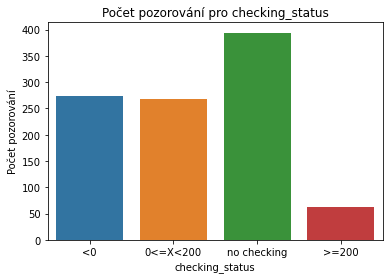

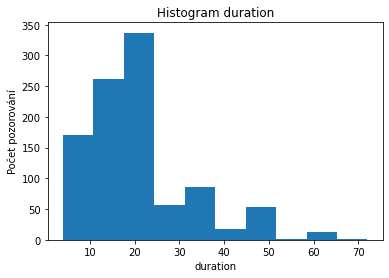

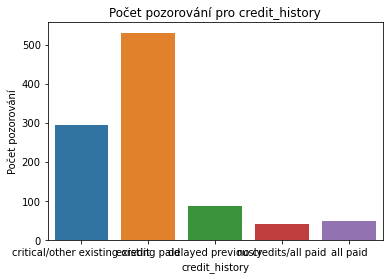

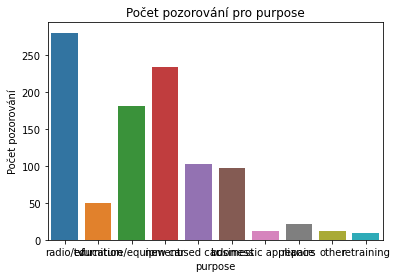

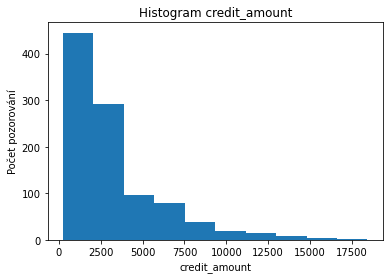

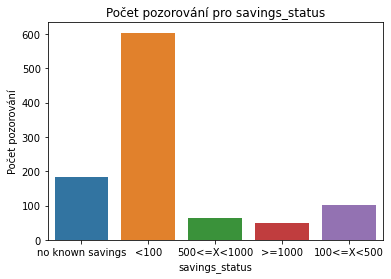

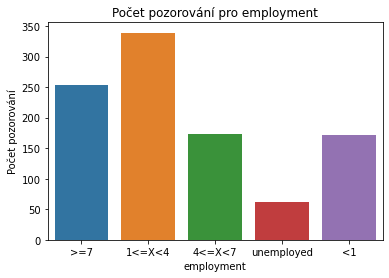

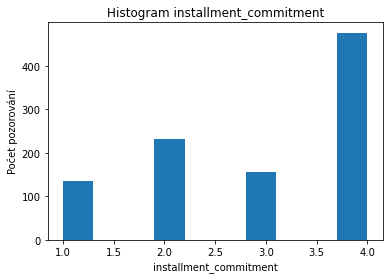

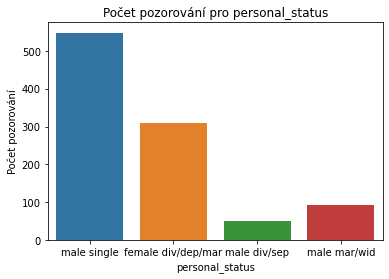

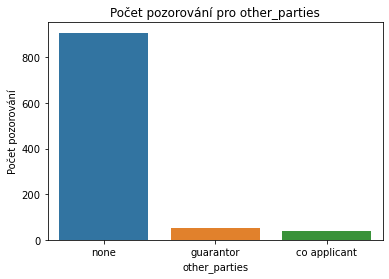

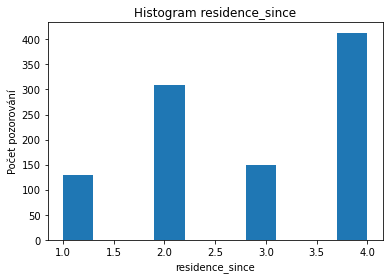

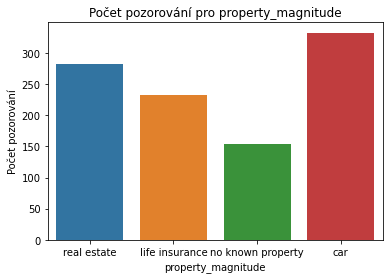

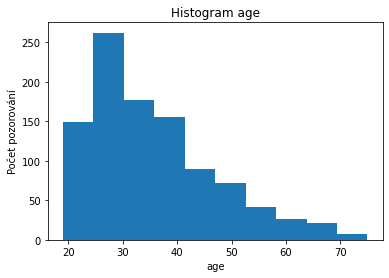

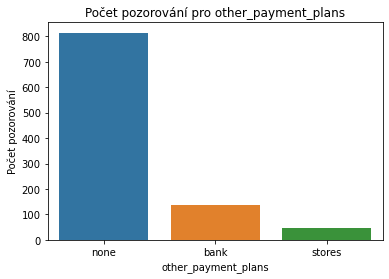

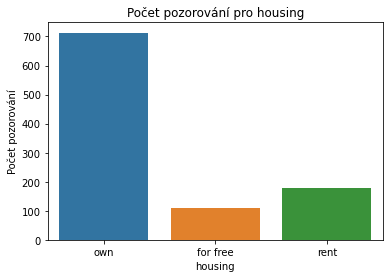

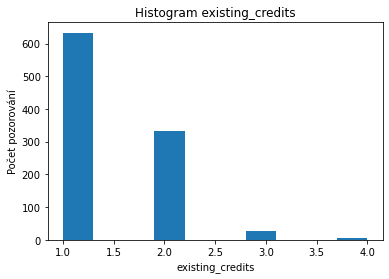

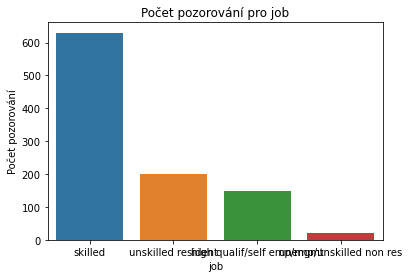

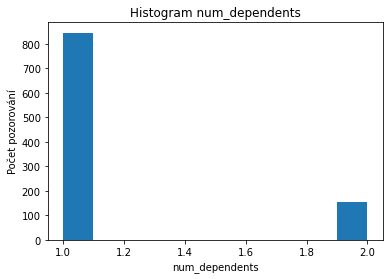

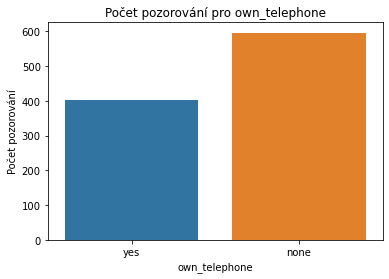

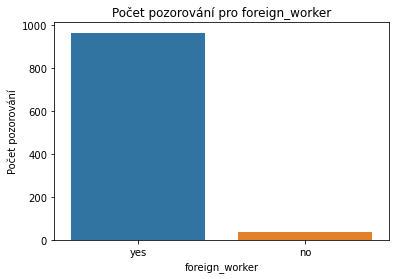

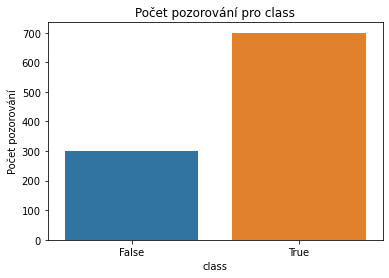

In [17]:
# loop přes všechny sloupce s daty
for col in data.columns:
    # vykreslení histogramu pro numerické proměnné
    if data[col].dtype == "int64" or data[col].dtype == "float64":
        plt.hist(data[col], bins=10)
        plt.xlabel(col)
        plt.ylabel("Počet pozorování")
        plt.title(f"Histogram {col}")
        plt.show()
    # vykreslení sloupcového grafu pro kategoriální proměnné
    else:
        sns.countplot(data=data, x=col)
        plt.xlabel(col)
        plt.ylabel("Počet pozorování")
        plt.title(f"Počet pozorování pro {col}")
        plt.show()

#### Zobrazenie závislostí

<AxesSubplot:xlabel='purpose', ylabel='count'>

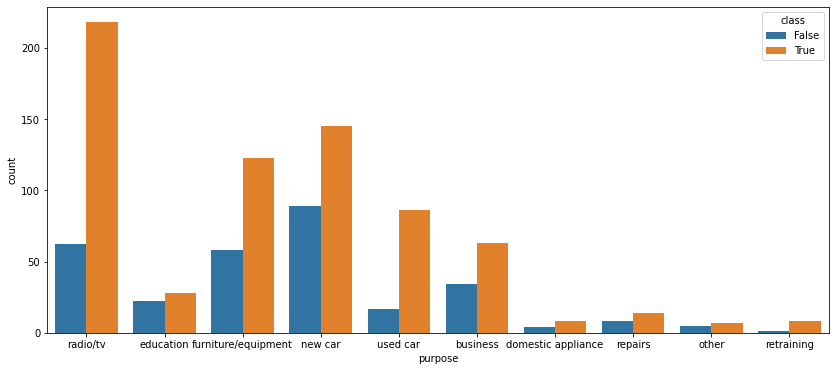

In [18]:
#Zavislost počtu požičiek na účele požičky, rozdelené podla class
plt.subplots(figsize=(14, 6))
sns.countplot( x= "purpose", hue = "class" , data = data)

<AxesSubplot:xlabel='age', ylabel='Count'>

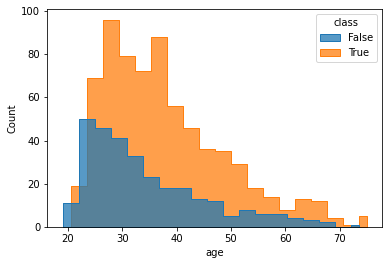

In [35]:
#Histogram veku, rozdelená cez class
sns.histplot(data=data, x="age", hue="class", multiple="dodge", element="step")

<AxesSubplot:xlabel='credit_amount', ylabel='Count'>

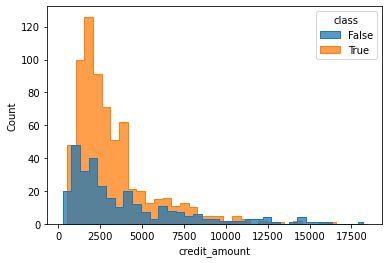

In [36]:
#Histogram hodnoty požičky, rozdelená cez class
sns.histplot(data=data, x="credit_amount", hue="class", multiple="dodge", element="step")

<AxesSubplot:xlabel='duration', ylabel='Density'>

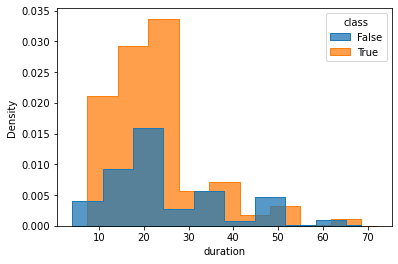

In [39]:
#Histogram času požičky, rozdelená cez class
sns.histplot(data=data, x="duration", hue="class", multiple="dodge",bins=10, element="step", stat="density")

<AxesSubplot:xlabel='employment', ylabel='credit_amount'>

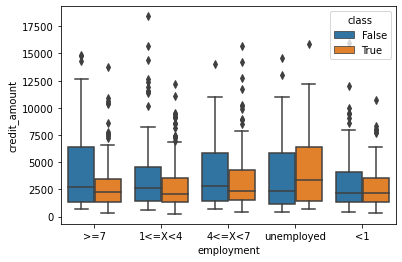

In [27]:
#Distribúcia hodnoty požičky v závislosti na počtu rokov v aktuálnom zamestnaní, rozdelené podla class
sns.boxplot( x= "employment", y ="credit_amount", hue = "class" , data = data)

<AxesSubplot:xlabel='purpose', ylabel='age'>

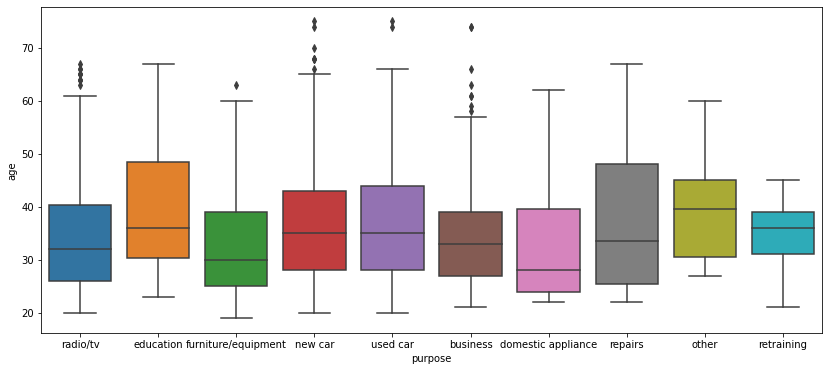

In [19]:
#Zobrazenie distribúcie veku podla účelu požičky    
plt.subplots(figsize=(14, 6))    
sns.boxplot( data = data, x ="purpose", y ="age")

<AxesSubplot:xlabel='personal_status', ylabel='credit_amount'>

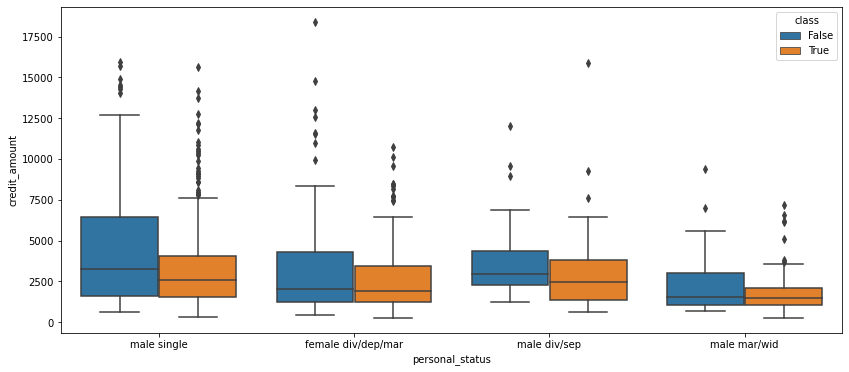

In [20]:
#Zobrazenie distribúcie hodnoty požičky podla statusu, rozdelené podla class
plt.subplots(figsize=(14, 6))    
sns.boxplot( data = data, x ="personal_status", y ="credit_amount", hue = "class")

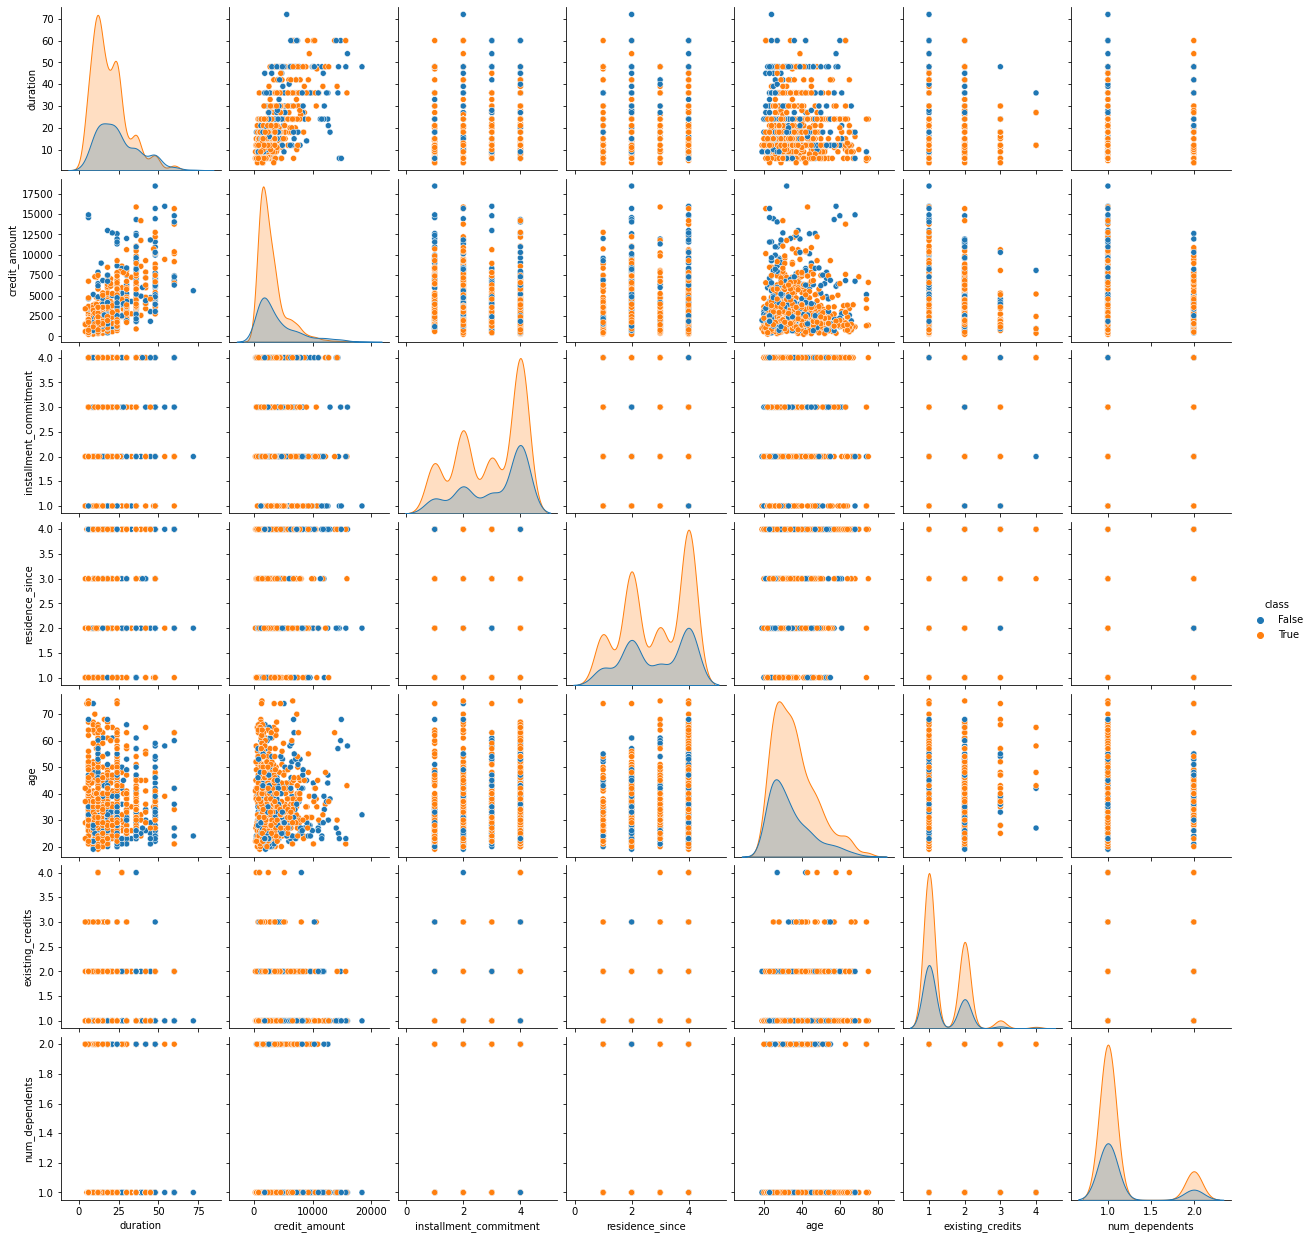

In [21]:
#párové scatterploty
sns.pairplot( data , vars = [ 'duration',  'credit_amount', 'installment_commitment', 'residence_since', 'age',  'existing_credits',  'num_dependents'], hue = "class")

<AxesSubplot:>

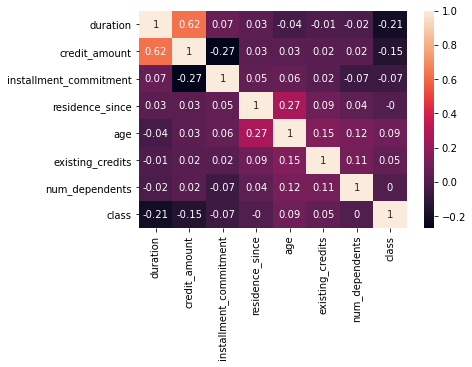

In [22]:
#korelačná matica
cor_matrix = round(data.corr(),2)
sns.heatmap(cor_matrix, annot=True)